In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import shapely

%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
taipei_vil = gpd.read_file('./台灣里界圖_TWD97/')

In [3]:
臺北市 = taipei_vil[taipei_vil['C_Name']=='臺北市'].groupby(by='T_Name').agg(lambda t: t.unary_union)

In [4]:
臺北市 = gpd.GeoDataFrame(臺北市)

In [5]:
road_df_cen = pd.read_pickle('road_df_cen.pickle')

In [6]:
road_df_cen['x'] = road_df_cen.centroid.apply(lambda t: t.x)

In [7]:
road_df_cen['y'] = road_df_cen.centroid.apply(lambda t: t.y)

In [8]:
road_df_cen_xyp = road_df_cen[['x', 'y', 'p', 'name', 'set']]

In [9]:
road_df_cen_xyp = road_df_cen_xyp.dropna()

In [10]:
import pysal

In [11]:
road_df_cen_pos = road_df_cen_xyp[['x', 'y']].values

In [12]:
kw = pysal.Kernel(road_df_cen_pos)

In [13]:
val = road_df_cen_xyp['p'].values

In [14]:
mi = pysal.Moran(val, kw)

In [15]:
mi.I

0.051496853934016498

In [16]:
mi.p_norm

0.066928011014248057

In [17]:
mi.z_norm

1.8321571488325172

---

In [53]:
road_df_cen = pd.read_pickle('road_df_cen.pickle')

road_df_cen['x'] = road_df_cen.centroid.apply(lambda t: t.x)
road_df_cen['y'] = road_df_cen.centroid.apply(lambda t: t.y)
road_df_cen_xyp = road_df_cen[['x', 'y', 'p']]
road_df_cen_xyp = road_df_cen_xyp.dropna()
road_df_cen_pos = road_df_cen_xyp[['x', 'y']].values
kw = pysal.Kernel(road_df_cen_pos)
val = road_df_cen_xyp['p'].values
mi = pysal.Moran(val, kw, two_tailed=False)

In [54]:
mi.I

0.051496853934016498

In [55]:
mi.p_norm

0.033464005507124028

In [56]:
mi.z_norm

1.8321571488325172

In [57]:
lm = pysal.Moran_Local(val, kw)
len(lm.p_sim[lm.p_sim > 0.3])

58

----

In [58]:
road_df_cen = pd.read_pickle('road_df_cen_酒駕.pickle')

road_df_cen['x'] = road_df_cen.centroid.apply(lambda t: t.x)
road_df_cen['y'] = road_df_cen.centroid.apply(lambda t: t.y)
road_df_cen_xyp = road_df_cen[['x', 'y', 'p']]
road_df_cen_xyp = road_df_cen_xyp.dropna()
road_df_cen_pos = road_df_cen_xyp[['x', 'y']].values
kw = pysal.Kernel(road_df_cen_pos)
val = road_df_cen_xyp['p'].values
mi = pysal.Moran(val, kw, two_tailed=False)

In [59]:
mi.I

0.088853270621970487

In [60]:
mi.p_norm

0.0038842911464347374

In [61]:
mi.z_norm

2.6619655758892171

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/geopandas-0.1.0.dev_320b75d-py3.4.egg/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


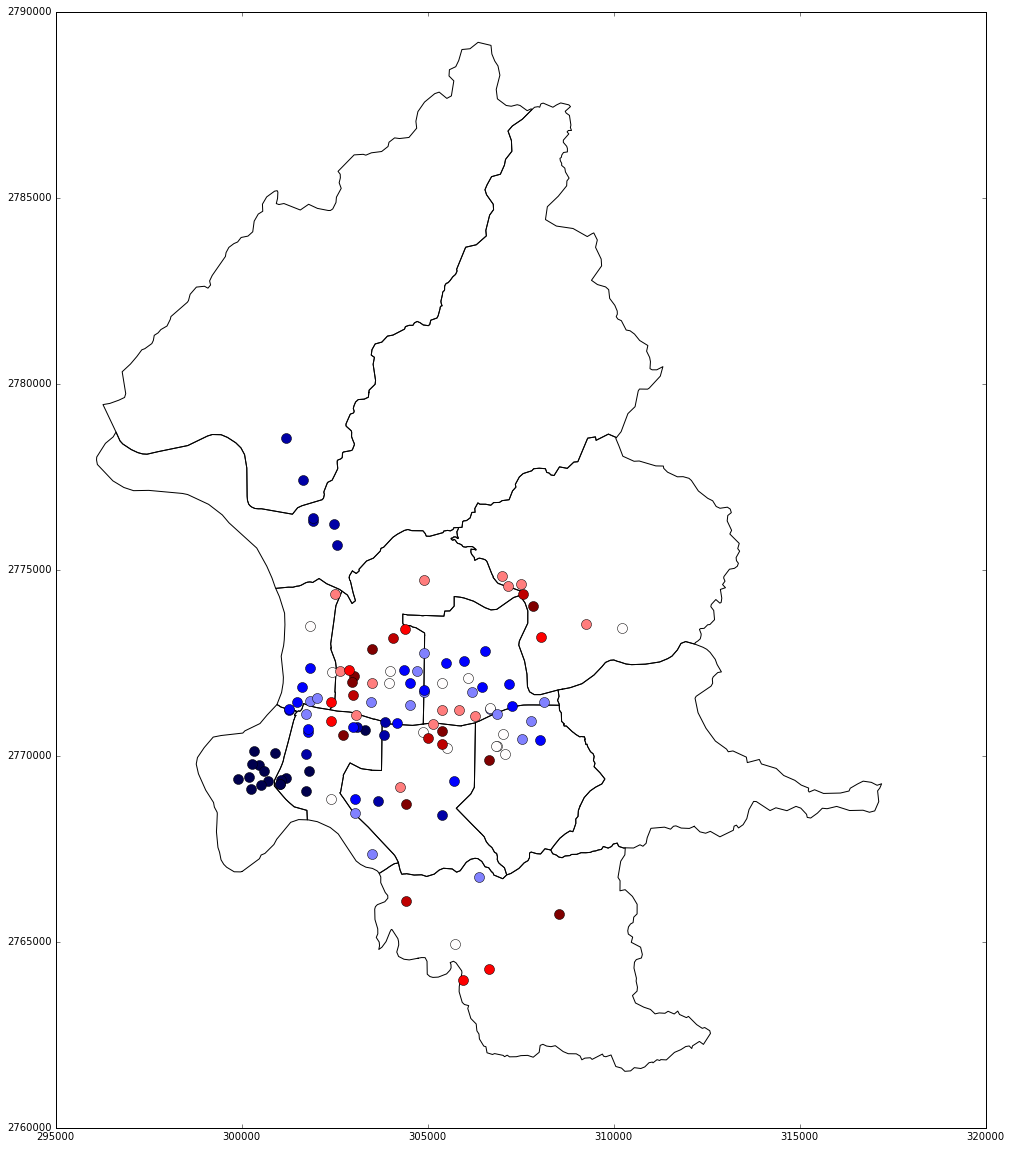

In [62]:
lm = pysal.Moran_Local(val, kw)
lm.p_sim

road_df_cen_xyp['p'] = lm.p_sim
road_df_cen_xyp['geometry'] = road_df_cen_xyp.apply(lambda t: shapely.geometry.Point(t[0], t[1]), axis=1)
road_df_cen_xyp = gpd.GeoDataFrame(road_df_cen_xyp)
ax = 臺北市.plot(color='white')
road_df_cen_xyp[road_df_cen_xyp['p'].isnull()].plot(color='gray', markersize=10, ax=ax)
road_df_cen_xyp[~road_df_cen_xyp['p'].isnull()].plot(column='p', k=9,scheme='equal_interval', colormap='seismic', markersize=10,ax=ax)

In [603]:
pd.merge(road_df_cen_xyp, road_df_cen, left_index=True, right_index=True).sort_values(by='p_x', ascending=False).head()

,x_x,y_x,p_x,geometry_x,y_y,TotalVol,centroid,geometry_y,name,set,x_y,road_id,acc_count,p_y
12,303504.144165,2.772876e+06,0.495,POINT (303504.1441645696 2772875.729591806),2.772876e+06,48140.5,POINT (303504.1441645696 2772875.729591806),POINT (303504.1441645696 2772875.729591806),吉林路,"(民族東西路, 民生東西路)",303504.144165,20,3.000000,5.455406e-08
174,302729.438598,2.770565e+06,0.491,POINT (302729.4385977185 2770565.137249789),2.770565e+06,25853.0,POINT (302729.4385977185 2770565.137249789),POINT (302729.4385977185 2770565.137249789),濟南路,"(中山南北路, 杭州南北路)",302729.438598,257,7.000000,3.605338e-07
190,302974.129067,2.771973e+06,0.486,POINT (302974.1290673289 2771972.862150563),2.771973e+06,187492.0,POINT (302974.1290673289 2771972.862150563),POINT (302974.1290673289 2771972.862150563),長春路,"(中山南北路, 新生北路)",302974.129067,279,2.510031,2.848701e-08
61,305379.838831,2.770669e+06,0.483,POINT (305379.8388306369 2770669.263645397),2.770669e+06,101286.0,POINT (305379.8388306369 2770669.263645397),POINT (305379.8388306369 2770669.263645397),敦化南北路,"(市民大道, 忠孝東西路)",305379.838831,82,2.000000,5.466197e-08
70,303020.396877,2.772140e+06,0.475,POINT (303020.3968767211 2772140.429047822),2.772140e+06,139587.5,POINT (303020.3968767211 2772140.429047822),POINT (303020.3968767211 2772140.429047822),林森南北路,"(民生東西路, 長春路)",303020.396877,98,1.299284,2.688920e-08


----

In [63]:
road_df_cen = pd.read_pickle('road_df_cen_無酒駕.pickle')

road_df_cen['x'] = road_df_cen.centroid.apply(lambda t: t.x)
road_df_cen['y'] = road_df_cen.centroid.apply(lambda t: t.y)
road_df_cen_xyp = road_df_cen[['x', 'y', 'p']]
road_df_cen_xyp = road_df_cen_xyp.dropna()
road_df_cen_pos = road_df_cen_xyp[['x', 'y']].values
kw = pysal.Kernel(road_df_cen_pos)
val = road_df_cen_xyp['p'].values
mi = pysal.Moran(val, kw, two_tailed=False)

In [64]:
mi.I

0.079277291416902082

In [65]:
mi.p_norm

0.0032198491190534861

In [66]:
mi.z_norm

2.7245099887966009

In [67]:
lm = pysal.Moran_Local(val, kw)
len(lm.p_sim[lm.p_sim > 0.3])

53

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/geopandas-0.1.0.dev_320b75d-py3.4.egg/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


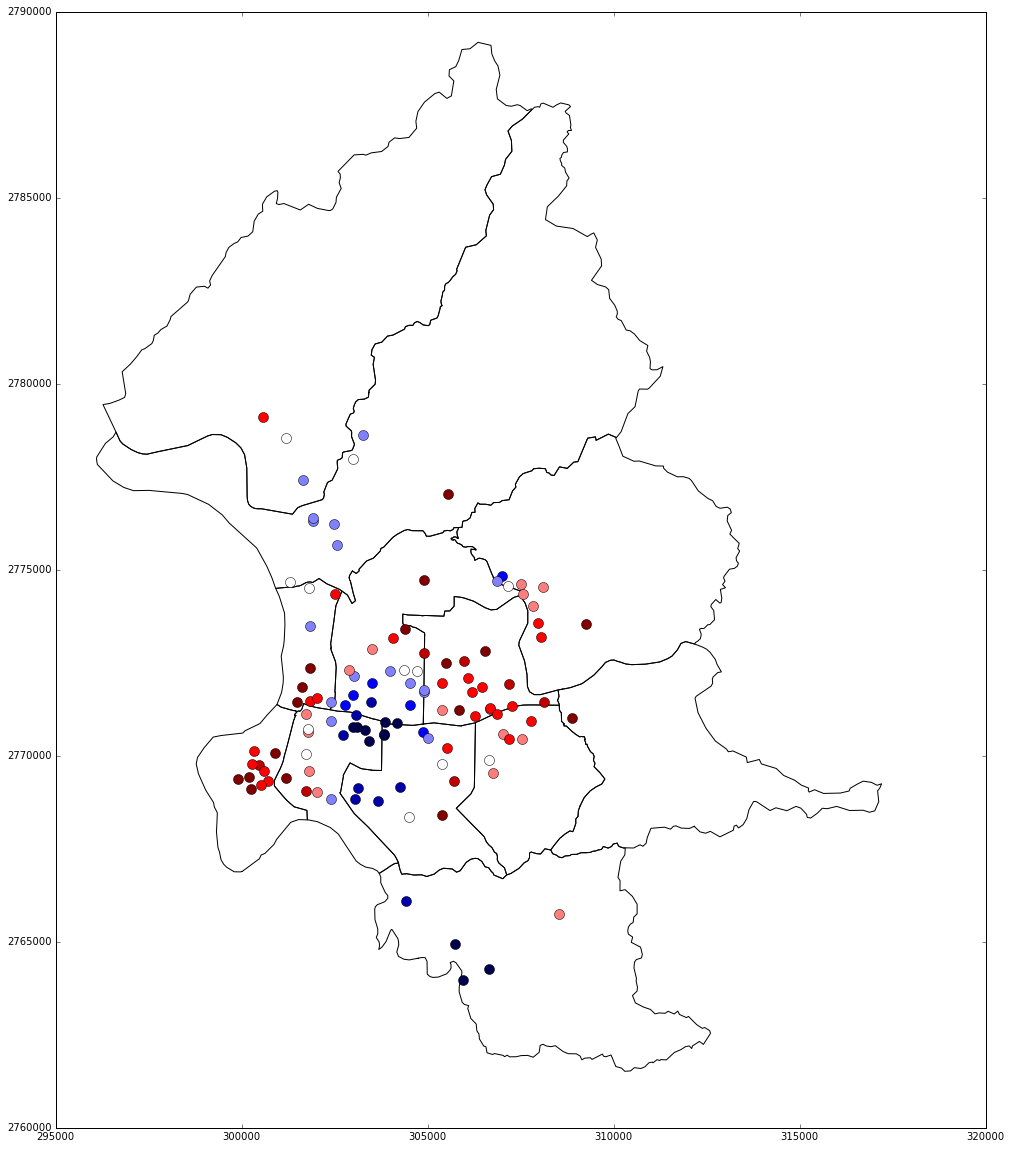

In [68]:
lm = pysal.Moran_Local(val, kw)
lm.p_sim

road_df_cen_xyp['p'] = lm.p_sim
road_df_cen_xyp['geometry'] = road_df_cen_xyp.apply(lambda t: shapely.geometry.Point(t[0], t[1]), axis=1)
road_df_cen_xyp = gpd.GeoDataFrame(road_df_cen_xyp)
ax = 臺北市.plot(color='white')
road_df_cen_xyp[road_df_cen_xyp['p'].isnull()].plot(color='gray', markersize=10, ax=ax)
road_df_cen_xyp[~road_df_cen_xyp['p'].isnull()].plot(column='p', k=9,scheme='equal_interval', colormap='seismic', markersize=10,ax=ax)

-

In [49]:
road_df_cen_酒駕 = pd.read_pickle('road_df_cen_酒駕.pickle')
road_df_cen_無酒駕 = pd.read_pickle('road_df_cen_無酒駕.pickle')

In [69]:
road_df_cen = pd.merge(road_df_cen_酒駕, road_df_cen_無酒駕, left_index=True, right_index=True)

In [70]:
x = road_df_cen[['p_x', 'p_y']]

In [71]:
x.corr()

,p_x,p_y
p_x,1.000000,0.363495
p_y,0.363495,1.000000
